In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from neural_network.network import NeuralNetwork
from neural_network.gradient_descent import stochastic_gradient_descent, batch_gradient_descent
from main import predict


In [2]:
df = pd.read_csv('./data/data.csv')

In [58]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
df.info

<bound method DataFrame.info of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.277

In [3]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [4]:
X = np.array(df.drop('diagnosis',axis=1))

y = np.array(df.diagnosis)

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=30)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
y_val = y_val.reshape(len(y_val), 1)


In [89]:
epochs = 300
batch_size = 100
learning_rate = 0.001
layers =  [(8, "tanh"), (6, "tanh"), (1, "sigmoid")]

In [90]:
model = NeuralNetwork(X_train.shape[1],
                      layers,
                      learning_rate
                    )
model.create_network()
print(model.architecture)
result = batch_gradient_descent(epochs, model, X_train, y_train, X_val, y_val)
print(f"Model accuracy score...:{result['accuracy']}")
bgd_losses = result['losses']

[{'input_dim': 30, 'output_dim': 8, 'activation': 'tanh'}, {'input_dim': 8, 'output_dim': 6, 'activation': 'tanh'}, {'input_dim': 6, 'output_dim': 1, 'activation': 'sigmoid'}]
Progress: 0.0% ... Training loss: 0.44093104259668364 ... Validation loss: 0.412284541427835
Progress: 0.3% ... Training loss: 0.44038341371694056 ... Validation loss: 0.41179356970424214
Progress: 0.7% ... Training loss: 0.43983873874309126 ... Validation loss: 0.41130631048069705
Progress: 1.0% ... Training loss: 0.4392970064391286 ... Validation loss: 0.4108227491075568
Progress: 1.3% ... Training loss: 0.43875820571884305 ... Validation loss: 0.4103428709526107
Progress: 1.7% ... Training loss: 0.43822232564295116 ... Validation loss: 0.40986666140131944
Progress: 2.0% ... Training loss: 0.4376893554162587 ... Validation loss: 0.40939410585714553
Progress: 2.3% ... Training loss: 0.4371592843848559 ... Validation loss: 0.4089251897419739
Progress: 2.7% ... Training loss: 0.4366321020333479 ... Validation loss

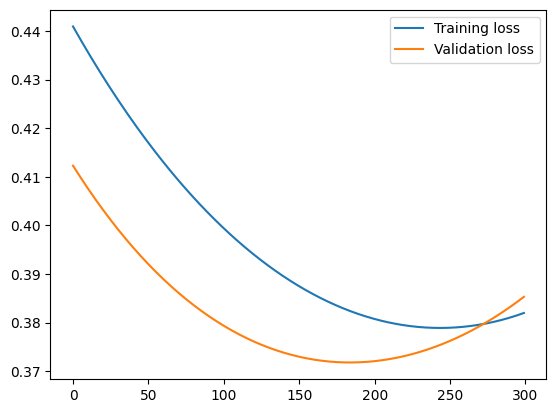

In [91]:
plt.plot(bgd_losses['train'], label='Training loss')
plt.plot(bgd_losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [92]:
bgd_model_prediction_accuracy = predict(model, X_test, y_test)
print(f"Model prediction accuracy score...:{bgd_model_prediction_accuracy}")

Model prediction accuracy score...:0.8596491228070176


In [55]:
model = NeuralNetwork(X_train.shape[1],
                      layers,
                      learning_rate
                    )
model.create_network()
print(model.architecture)
result = stochastic_gradient_descent(epochs, model, X_train, y_train, X_val, y_val, batch_size)
print(f"Model accuracy score...:{result['accuracy']}")
sgd_losses = result['losses']

[{'input_dim': 30, 'output_dim': 8, 'activation': 'tanh'}, {'input_dim': 8, 'output_dim': 6, 'activation': 'tanh'}, {'input_dim': 6, 'output_dim': 1, 'activation': 'sigmoid'}]
Progress: 0.0% ... Training loss: 0.43326977391616667 ... Validation loss: 0.4269170074688577
Progress: 0.4% ... Training loss: 0.4516461937696309 ... Validation loss: 0.42602279186546355
Progress: 0.8% ... Training loss: 0.46732779849891615 ... Validation loss: 0.425431064660463
Progress: 1.2% ... Training loss: 0.4147273830155666 ... Validation loss: 0.4251725578689469
Progress: 1.6% ... Training loss: 0.4116231754069586 ... Validation loss: 0.4247611916609536
Progress: 2.0% ... Training loss: 0.41701300181206874 ... Validation loss: 0.42404674271503007
Progress: 2.4% ... Training loss: 0.40077981637125176 ... Validation loss: 0.4240055953413485
Progress: 2.8% ... Training loss: 0.4525863257275997 ... Validation loss: 0.42333980922820197
Progress: 3.2% ... Training loss: 0.4857215030300337 ... Validation loss: 

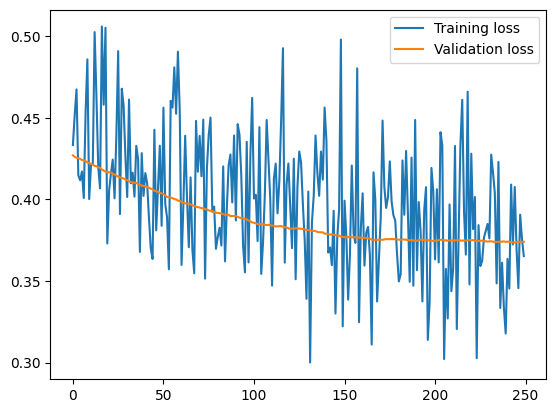

In [56]:
plt.plot(sgd_losses['train'], label='Training loss')
plt.plot(sgd_losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [57]:
sgd_model_prediction_accuracy = predict(model, X_test, y_test)
print(f"Model prediction accuracy score...:{sgd_model_prediction_accuracy}")

Model prediction accuracy score...:0.8654970760233918
